In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('threads.csv')
df['busy'] = df['busy'].astype('category')

real_max = df['runtime'] * df['threads']
user_pct = df['usertime'] / real_max
user_pct = user_pct.clip(upper=1.0)
df['usertime'] /= df['threads']
df['user-pct'] = user_pct

df['energy-user'] = df['user-pct'] * df['energy']

df['W'] = df['energy'] / df['runtime']

df0 = df[df['busy'] == 0]

df

,busy,threads,energy,runtime,usertime,user-pct,energy-user,W
0,0,1,7.331678,0.059107,0.059118,1.000000,7.331678,124.041720
1,0,2,3.541273,0.029319,0.029074,0.991659,3.511736,120.785853
2,0,3,3.678228,0.029471,0.019484,0.661115,2.431730,124.807652
3,0,4,2.235848,0.014820,0.014644,0.988098,2.209236,150.863891
4,0,5,1.995545,0.011887,0.011706,0.984793,1.965198,167.873146
...,...,...,...,...,...,...,...,...
283,32,28,3.306599,0.014131,0.002325,0.164506,0.543954,233.992639
284,32,29,3.195850,0.013648,0.002230,0.163378,0.522131,234.153969
285,32,30,3.226860,0.013699,0.002189,0.159824,0.515730,235.551857
286,32,31,3.043500,0.012930,0.002106,0.162897,0.495777,235.383233


In [20]:
df_speedup = df.copy()

for col in df_speedup.columns[2:]:
    df_speedup[col] = df_speedup[col].iloc[0] / df_speedup[col]

df_speedup0 = df_speedup.loc[df_speedup['busy'] == 0]

df_speedup

,busy,threads,energy,runtime,usertime,user-pct,energy-user,W
0,0,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0,2,2.070351,2.016008,2.033357,1.008411,2.087765,1.026956
2,0,3,1.993264,2.005572,3.034207,1.512597,3.015005,0.993863
3,0,4,3.279149,3.988215,4.037035,1.012046,3.318648,0.822209
4,0,5,3.674023,4.972277,5.050033,1.015442,3.730758,0.738902
...,...,...,...,...,...,...,...,...
283,32,28,2.217287,4.182696,25.430775,6.078824,13.478496,0.530109
284,32,29,2.294124,4.330626,26.511940,6.120784,14.041839,0.529744
285,32,30,2.272078,4.314614,27.001221,6.256878,14.216114,0.526600
286,32,31,2.408962,4.571279,28.067809,6.138850,14.788258,0.526978


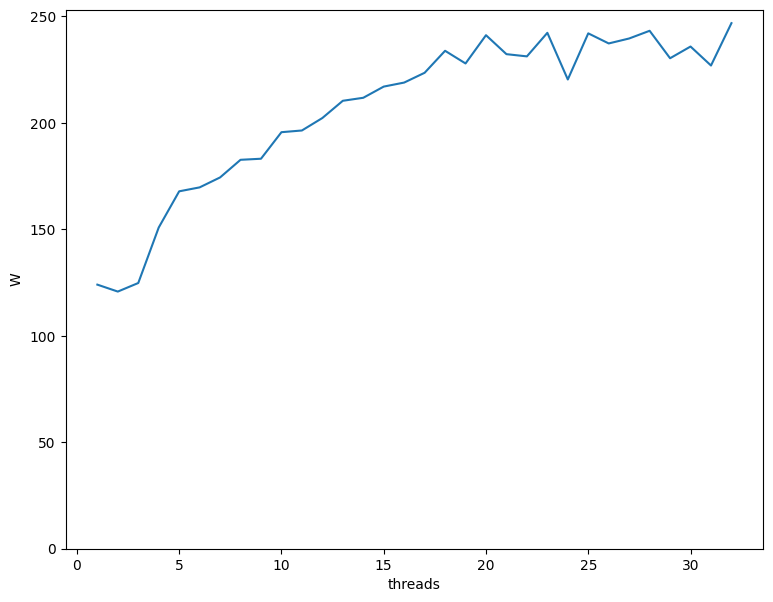

In [21]:
plt.figure(figsize=(9,7))
ax = sns.lineplot(df0, x='threads', y='W')
ax.set_ylim((0, None))
plt.show()

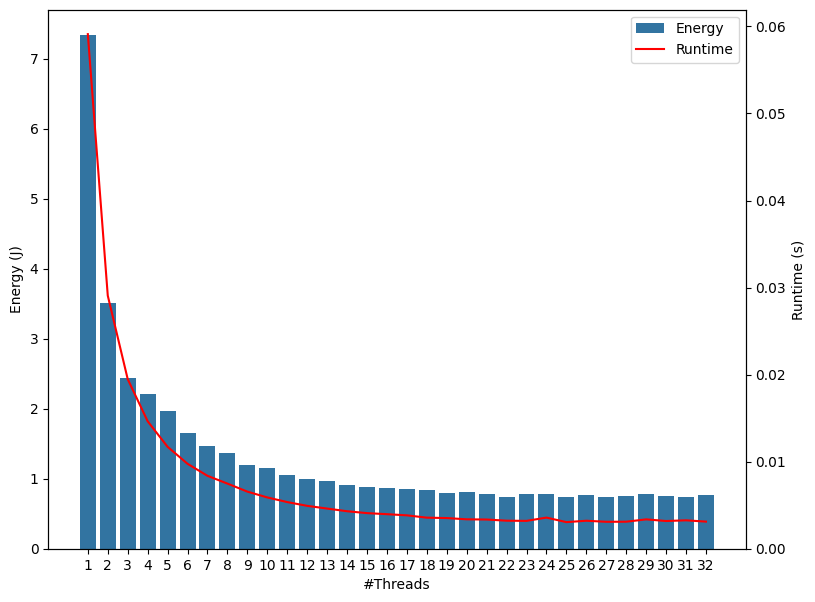

In [22]:
plt.figure(figsize=(9,7))

ax1 = sns.barplot(df0, x='threads', y='energy-user', label='Energy', legend=False)

ax2 = ax1.twinx()

sns.lineplot(df0, x=df0.index, y='usertime', label='Runtime', color='r', ax=ax2)

ax1.set_xlabel('#Threads')
ax1.set_ylabel('Energy (J)')
ax2.set_ylabel('Runtime (s)')
ax2.set_ylim((0, None))

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2)

plt.show()

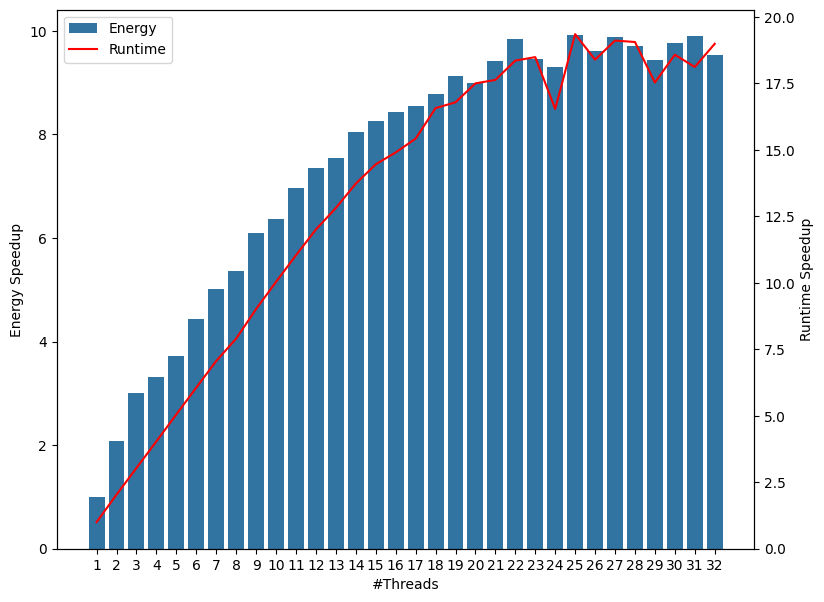

In [23]:
plt.figure(figsize=(9,7))

ax1 = sns.barplot(df_speedup0, x='threads', y='energy-user', label='Energy', legend=False)

ax2 = ax1.twinx()

sns.lineplot(df_speedup0, x=df_speedup0.index, y='usertime', label='Runtime', color='r', ax=ax2)

ax1.set_xlabel('#Threads')
ax1.set_ylabel('Energy Speedup')
ax2.set_ylabel('Runtime Speedup')
ax2.set_ylim((0, None))

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2)

plt.show()

# With busy threads

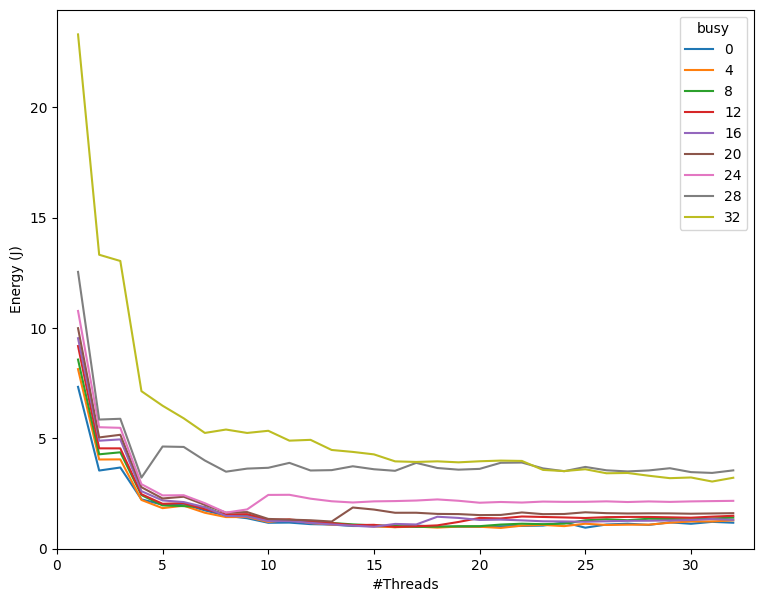

In [25]:
plt.figure(figsize=(9,7))

ax = sns.lineplot(df, x='threads', y='energy', hue='busy')

ax.set_xlabel('#Threads')
ax.set_ylabel('Energy (J)')
ax.set_xlim((0, 33))
ax.set_ylim((0, None))

plt.show()

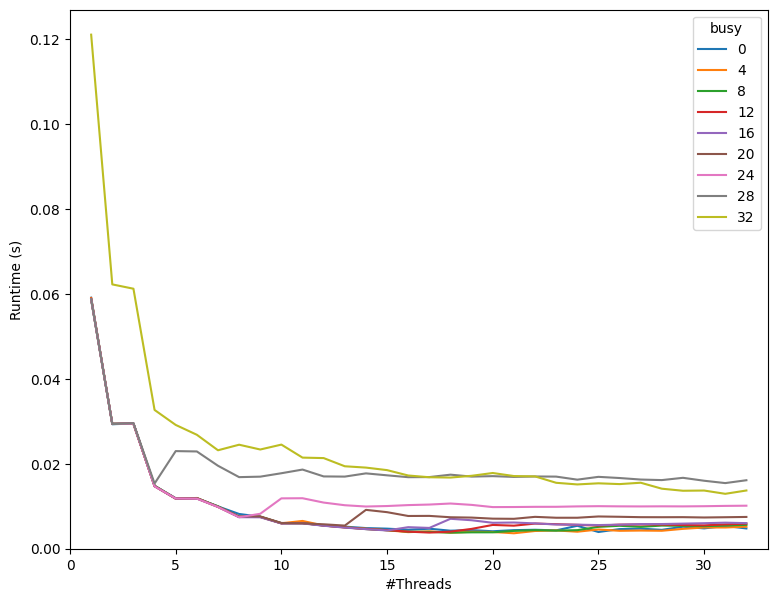

In [26]:
plt.figure(figsize=(9,7))

ax = sns.lineplot(df, x='threads', y='runtime', hue='busy')

ax.set_xlabel('#Threads')
ax.set_ylabel('Runtime (s)')
ax.set_xlim((0, 33))
ax.set_ylim((0, None))

plt.show()